In [52]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import io
from skimage import exposure
import scipy.ndimage as sci
from math import floor

In [55]:
def HOG(raw_image,w=30,h=30,nb_bins=9,plot=False):
    """
    Computes Histogram of Oriented Gradients of given image with \
    cells of size w x h and nb_bins bins. If plot=True then gradient \
    magnitude, grid and HOG will be plotted
    """

    ##--Computation--

    raw_image = raw_image/255 #Pixel values are mapped from [0,255] to [0,1] 

    #--Convolution--

    def convolution(matrix,kernel):
        """
        Return convolution of 3x3 kernel over matrix. Avoid matrix borders
        """
        I,J = np.shape(matrix)
        result = np.copy(matrix)
        
        for i in range(1,I-1):
            for j in range(1,J-1):

                result[i,j] =  np.sum(raw_image[i-1:i+2,j-1:j+2] * kernel)

        return result


    kernel_Dx = np.array([[0,0,0],[-1,0,1],[0,0,0]])
    kernel_Dy = np.array([[0,-1,0],[0,0,0],[0,1,0]])


    #--Gradient computation--
    Ix = convolution(raw_image,kernel_Dx)
    Iy = convolution(raw_image,kernel_Dy)
    G = np.sqrt( np.power(Ix,2) + np.power(Iy,2) )


    #--Orientation computation--
    def signed_gradient_orientation(Ix,Iy):
        '''Return signed gradient orientation in degrees'''
        teta = 180/np.pi * np.arctan2(Iy,Ix)
        if teta >= 0:
            return teta
        else:
            return teta + 360 

    signed_gradient_orientation = np.vectorize(signed_gradient_orientation)

    teta = signed_gradient_orientation(Ix,Iy)

    #--Cell Histogram calculation--
    H,W = np.shape(raw_image)
    I,J = floor(H/h)+1, floor(W/w)+1

    histograms = [[0]*J for k in range(I)]

    for i in range(I):
        for j in range(J):
            histograms[i][j] = np.histogram(teta[i*h:i*h + h, j*w:j*w + w],bins=nb_bins)[0]

    ##--Plot--
    # Only executed if plot=True. Plots gradient magnitude, grid and HOG 
    if plot:
        #--Gradient classification--
        Gc = np.where(teta <= 180, 1, 0)

        #--Ploting image--
        fig1 = plt.figure()
        ax2 = fig1.add_subplot(221)
        ax3 = fig1.add_subplot(222)
        ax4 = fig1.add_subplot(223)
        ax5 = fig1.add_subplot(224)

        ax2.imshow(Ix,cmap="gray")
        ax3.imshow(Iy,cmap="gray")
        ax4.imshow(G,cmap="gray")
        ax5.imshow(Gc)

        ax2.set_title('Gradient according to x')
        ax3.set_title('Gradient according to y')
        ax4.set_title('Magnitude of the gradient')
        ax5.set_title('Gradient orientation classification')
  
        #--Grid Plot--
        vertical_lines = [0]*J
        horizontal_lines = [0]*I

        for j in range(J):
            vertical_lines[j] = [[j*h,j*h],[0,H]]

        for i in range(I):
            horizontal_lines[i] = [[0,W],[i*w,i*w]]

        fig2 = plt.figure()
        grid = fig2.add_subplot(111)
        grid.imshow(raw_image,cmap="gray")

        for k in range(J):
            grid.plot(vertical_lines[k][0],vertical_lines[k][1],color='red')

        for k in range(I):
            grid.plot(horizontal_lines[k][0],horizontal_lines[k][1],color='red')

        #--Cell Histogram Plot--
        fig3,axes = plt.subplots(I, J, sharex='col', sharey='row')

        for i in range(I):
            for j in range(J):
                axes[i][j].bar([k for k in range(nb_bins)],histograms[i][j])

        plt.show()

    return histograms

In [72]:
w = 15
h = 15
nb_bins = 9

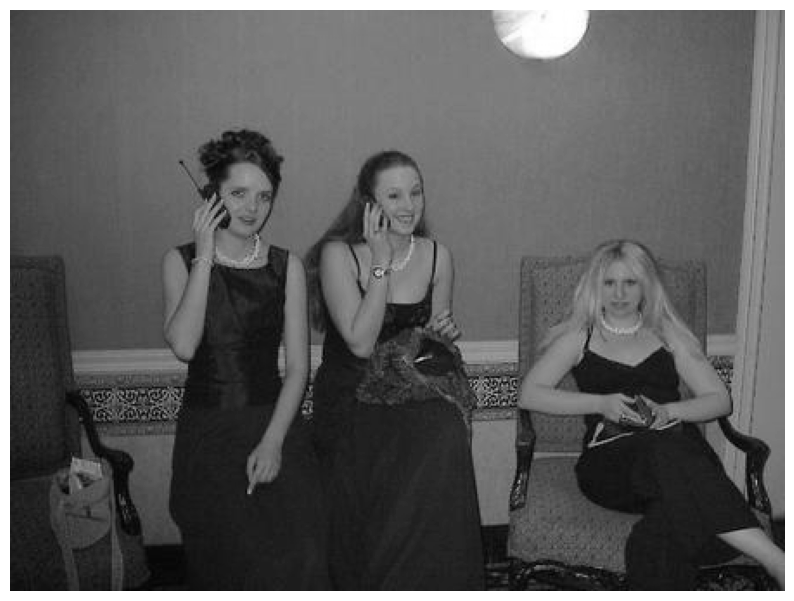

In [73]:
image = io.imread('coco128/images/train2017/000000000536.jpg',as_gray=True)
plt.imshow(image,cmap="gray")
plt.axis('off');

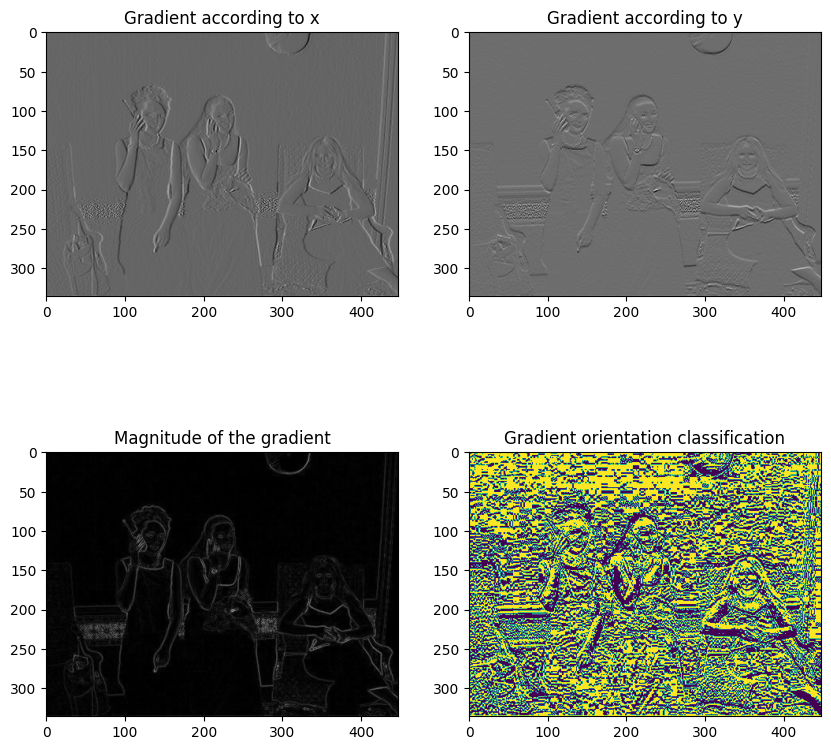

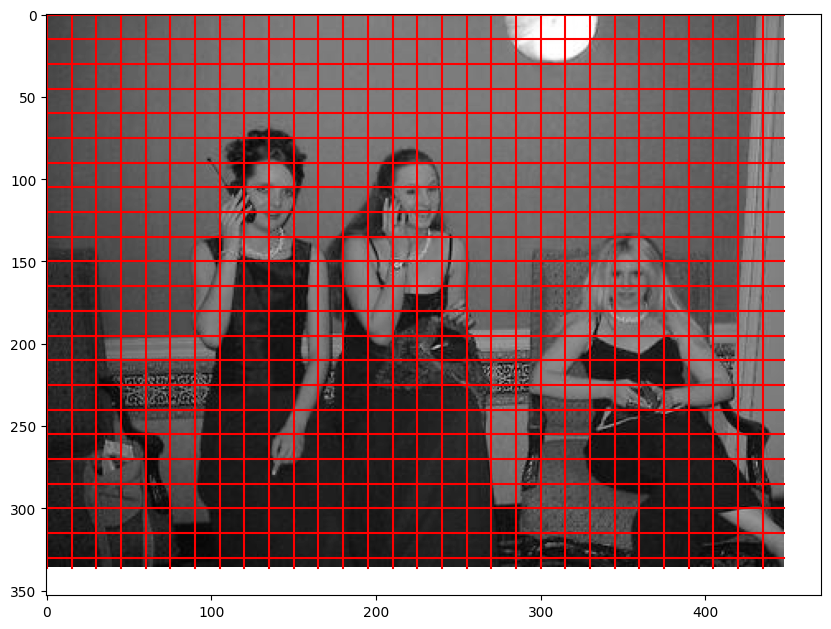

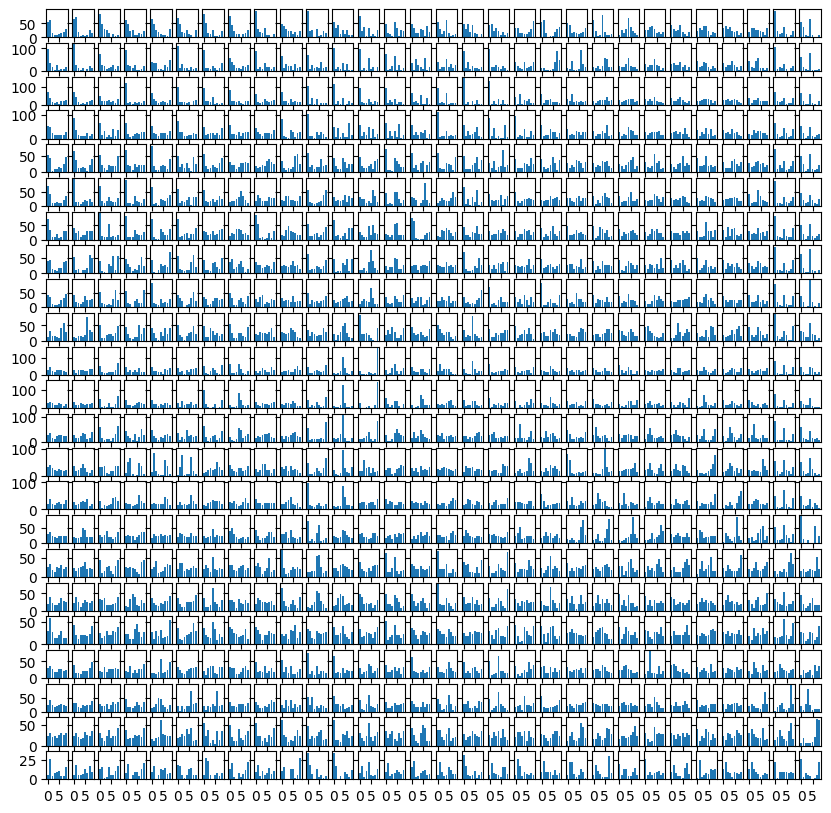

In [74]:
plt.rcParams["figure.figsize"] = (10,10)
HOG(image,w,h,nb_bins,plot=True);